# Mise en place

On commence par importer les librairies et la base de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data/house_price.csv")

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Pour utiliser facilement matplotlib, il faut respecter certaines étapes

In [9]:
# On commence par préparer si besoin les données
zone_count = df.MSZoning.value_counts()

# Graphique simple (exemple barplot)

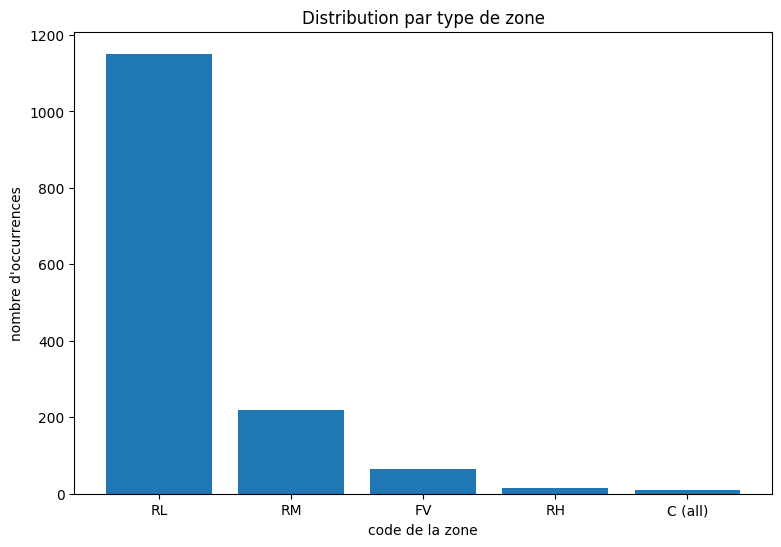

<Figure size 640x480 with 0 Axes>

In [15]:
# On commence par créer une figure qui va accueillir notre graphique
# De manière optionnelle, on peut ici préciser sa taille
plt.figure(figsize=(9,6))

# On définit ensuite le type de graphique souhaité en fonction des données
# Je commence ici par la distribution d'une variable catégorielle, je choisis donc un barplot
# on peut voir dans la doc que chaque type de graphe possède ses propres options
plt.bar(zone_count.index, zone_count.values)

# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
plt.title("Distribution par type de zone")
plt.xlabel("code de la zone")
plt.ylabel("nombre d'occurrences")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()

# On peut si on veut enregistrer cette figure
plt.savefig("figures/MsZoning_barplot.png")

# figure avec un graphes multiple

Il est fréquent qu'on veuille afficher plusieurs informations sur un même graphe
On cherche ici à mesurer l'écart entre la moyenne et la médiane.

In [44]:
# préparation des données

error_bar_data = df[["MSZoning", "SalePrice"]].groupby(by="MSZoning").agg(["mean","median"])
error_bar_data

# On peut ajouter une étape pour modifier les valeurs de MSZoning, on définit dans un premier temps un dictionnaire de mapping qu'on utilisera ensuite

map_dict={
       "A"  :	"Agriculture",
       "C (all)"	: "Commercial",
       "FV" :	"Floating Village Residential",
       "I"  :	"Industrial",
       "RH" :	"Residential High Density",
       "RL"	: "Residential Low Density",
       "RP"	: "Residential Low Density Park ",
       "RM"	: "Residential Medium Density"
}


In [21]:
error_bar_data.SalePrice["mean"]

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: mean, dtype: float64

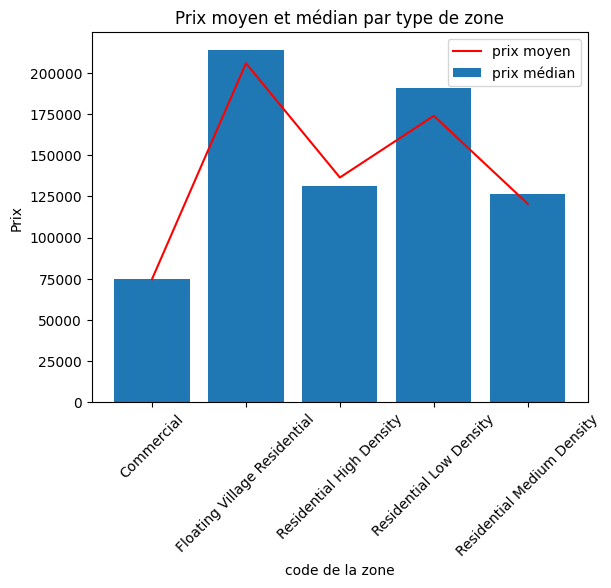

<Figure size 640x480 with 0 Axes>

In [45]:
# On respecte ensuite les mêmes étapes
plt.figure()

# On définit ensuite l'ensemble des graphes que l'on veut représenter (ici on en a deux mais on peut en avoir autant qu'on veut)
plt.bar(error_bar_data.index, error_bar_data.SalePrice["mean"], label ="prix moyen")
plt.plot(error_bar_data.index, error_bar_data.SalePrice["median"],c="red", label = "prix médian")


# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
plt.title("Prix moyen et médian par type de zone")
plt.xlabel("code de la zone")
plt.ylabel("Prix")

# On renome ici les axex (optionnel et compliqué)
# On commence par récupérer la location des "ticks" de l'axe x , un tick correspond à une case
locs, labels = plt.xticks()
# On modifie ensuite les labels de chaque tick à l'aide d'un dictionnaire
plt.xticks(ticks=locs, labels=error_bar_data.index.to_series().map(map_dict))
# On va réorienter notre axe x car les noms sont trop longs
plt.tick_params(axis='x',labelrotation=45.0)

# Comme ici on a deux graphes, il faut une légende pour les distinguer
plt.legend()

# On affiche notre graphe (optionnel sur les notebook)
plt.show()

# On peut si on veut enregistrer cette figure
plt.savefig("figures/MsZoning_errorbarplot.png")

# figure avec plusieurs graphes

Pour afficher plusieurs graphes sur une figure on va utiliser la fonction suivante:

**`plt.subplot(nb_lignes,nb_colonne,graphique_actuel)`**

Préparation des données

In [65]:
# On retire les valeurs extremes:
df = df.loc[df.SalePrice<500000,:]
df = df.loc[df.LotArea<50000,:]
color_map={
       "A"  :	"black",
       "C (all)"	: "blue",
       "FV" :	"grey",
       "I"  :	"purple",
       "RH" :	"yellow",
       "RL"	: "green",
       "RP"	: "orange",
       "RM"	: "red"
}
df["MSZoning_color"] = df["MSZoning"].map(color_map)


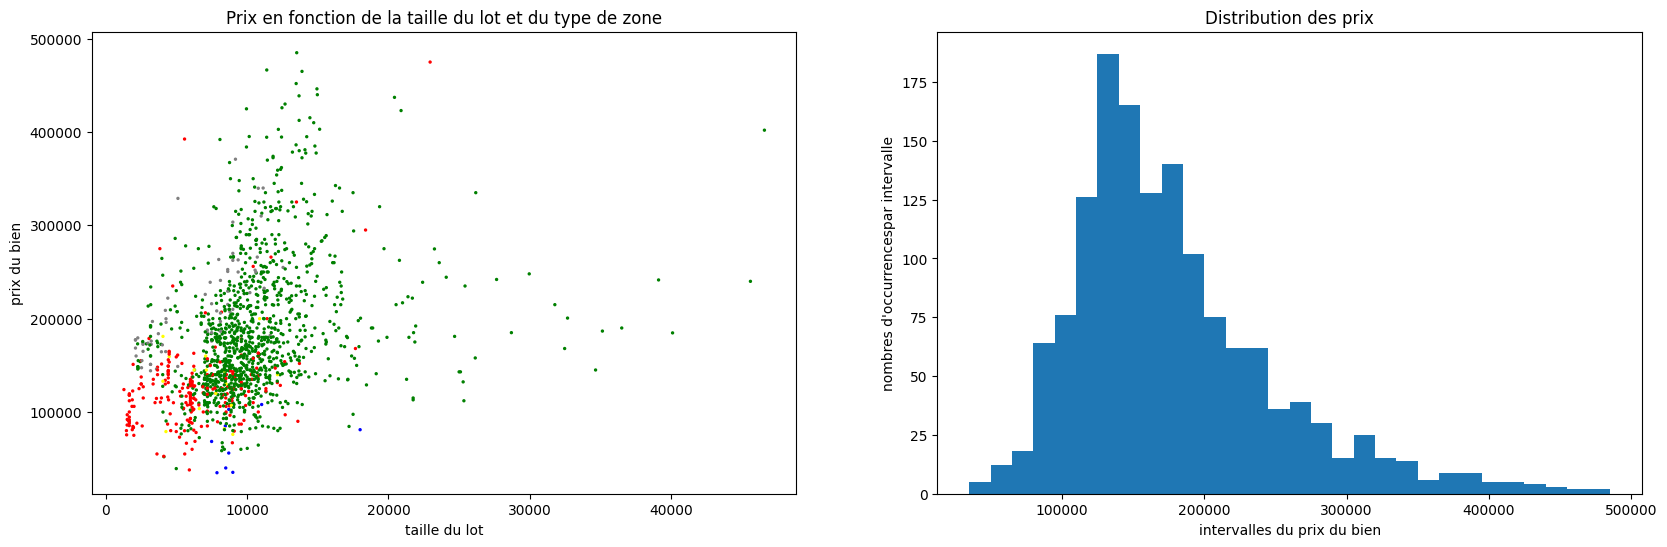

In [78]:
# On commence par déclarer une nouvelle figure
plt.figure(figsize=(20,6))

# On indique ensuite que notre figure comportera une ligne, deux colonnes, et qu'on travaille sur le premier graphe
plt.subplot(1,2,1)

# On crée ensuite notre figure
plt.scatter(x=df.LotArea, y =df.SalePrice, c=df.MSZoning_color, s=2)

# on ajoute les titres
plt.title("Prix en fonction de la taille du lot et du type de zone")
plt.xlabel("taille du lot")
plt.ylabel("prix du bien")

# On ajoute pas de légende car c'est compliqué avec matplot. On utilisera pour ça d'autres librairies

# On travaille maintenant sur le second graphe
plt.subplot(1,2,2)

# On crée ensuite notre figure
plt.hist(x=df.SalePrice, bins=30)

# on ajoute les titres
plt.title("Distribution des prix")
plt.xlabel("intervalles du prix du bien")
plt.ylabel("nombres d'occurrencespar intervalle")

plt.show()






# Pour aller plus loin avec matplotlib

Matplotlib est directemet intégré dans pandas, ainsi l'objet dataframe possède la méthode [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) qui permet de faire des graphiques simples

<AxesSubplot: >

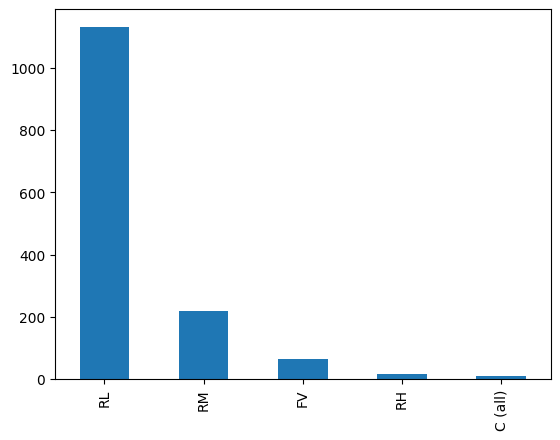

In [79]:
df.MSZoning.value_counts().plot(kind="bar", title="distribution de MSZoning")

Il existe deux méthodes pour créer des graphiques avec matplotlib. 

Nous avons vu la première qui utilise différentes fonctions du package pyplot de matplotlib.  
La deuxième méthode est orientée objet est consiste à instancier un objet subplots pour récupérer deux objets une figure et des axes (fig,ax) dont on va utiliser les méthodes et modifier les attributs.

La première méthode est plus facile, je vous conseille de l'utilser, ce qu'il ne faut surtout pas faire, c'est mélanger les deux méthodes.
Quand vous allez chercher de l'information sur la documentation ou sur internet, vérifier bien que vous êtes dans la premiere méthode (que vous appelez des fonctions et que vous ne modifiez pas un objet)

Voici la bonne partie de la [documentation](https://matplotlib.org/stable/api/pyplot_summary.html)